
## Flower Classification using CNN

### Isha Sharma, Lei Chan, Kandace Richards

1. Introduction

There are millions of beautiful flowers bursting around every corner, & we've been constantly awed by the beauty & uniqueness of each flower. Classifiying different flowers from one another is indeed a challenging task, as there're a plethora of flowers to classify & flowers can appear similar to each other. However, classifiying different flowers species will be advantageous in the fields such as the pharmaceutical industry, botany, agricultural, & trade activities, which is why we thought of performing this task.

The main aim of this project is to solve a Supervised Image Classification problem of classifying the flower types - rose, chamomile, dandelion, sunflower, & tulip. In the end, we’ll have a trained model, which can predict the class of the flower using a Machine Learning algorithm, the Convolutional Neural Networks (CNN).

2. Source

The dataset used for this project was the Flowers Recognition dataset from Kaggle, which consists of 5 classes of flower species - rose, chamomile, dandelion, sunflower, & tulip, each having about 800 images. So, we’ve a total of 4242 images to train our model with.

3. Procedure

3.1 Importing Libraries

This code should only run once for the entire project because its purpose is to extract data and convert it into an npz file for use during the program. Once the npz file has been created, it does not need to be created multiple times since we hold a reference to these files.

Initally, the following libraries were imported to use in the data conversion process:

In [17]:
# used for manipulating directory paths
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path

# Data visualisation & manipulation
import pandas as pd 
import seaborn as sns

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np 

# Plotting library
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# dl libraries specifically for CNN
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers

# Import the Image module of PIL into the shell:
# pip install Pillow
# pip install opencv-python
from PIL import Image
from skimage.io import imread
import cv2

# Tells matplotlib to embed plots within the notebook
%matplotlib inline

import math

3.2 Reading the Dataset

After importing the libraries, we began importing the flower data, using the os & pandas modules. We also, extracted & plotted few sample of different flowers for some visualisation.

In [19]:
# Original dataset folder
# inputPath = Path('/')

flowersPath = Path('flowersData')

# Each species of flower is contained in a separate folder, & this is to get all the sub-directories
flowers = os.listdir(flowersPath)
print("Number of types of flowers: ", len(flowers))
print("Types of flowers: ", flowers)

# A list which contains tuples, the type of flower and the corresponding image path
flowersList = []

for species in flowers:
    # Get all the file names
    allFlowers = os.listdir(flowersPath / species)
    # Add them to the list
    for flower in allFlowers:
        flowersList.append((species, str(flowersPath /species) + '/' + flower))

# Build a dataframe        
flowersList = pd.DataFrame(data=flowersList, columns=['category', 'image'], index=None)
flowersList.head()

Number of types of flowers:  5
Types of flowers:  ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


,category,image
0,daisy,flowersData/daisy/14167534527_781ceb1b7a_n.jpg
1,daisy,flowersData/daisy/34718882165_68cdc9def9_n.jpg
2,daisy,flowersData/daisy/5512287917_9f5d3f0f98_n.jpg
3,daisy,flowersData/daisy/476857510_d2b30175de_n.jpg
4,daisy,flowersData/daisy/521762040_f26f2e08dd.jpg


Total number of flowers in the dataset:  3459
Flowers in each category: 
tulip        984
rose         784
daisy        769
sunflower    734
dandelion    188
Name: category, dtype: int64


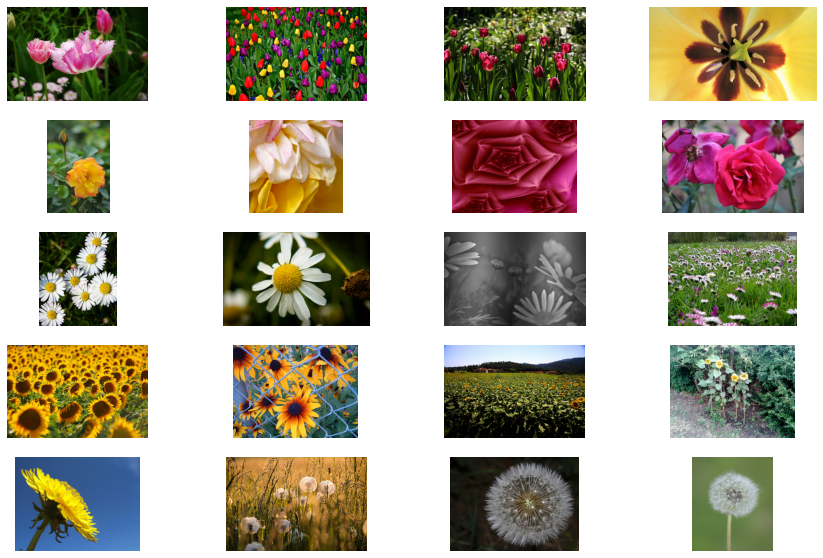

In [21]:
# Let's check how many samples for each category are present
print("Total number of flowers in the dataset: ", len(flowersList))
flowerNum = flowersList['category'].value_counts()
print("Flowers in each category: ")
print(flowerNum)

# A list for storing names of some random samples from each category
RanSamples = []

# Get samples fom each category 
for category in flowerNum.index:
    samples = flowersList['image'][flowersList['category'] == category].sample(4).values
    for sample in samples:
        RanSamples.append(sample)

# Plot the samples
f, ax = plt.subplots(5,4, figsize=(15,10))
for i,sample in enumerate(RanSamples):
    ax[i//4, i%4].imshow(mimg.imread(RanSamples[i]))
    ax[i//4, i%4].axis('off')
plt.show()    

This snippet is to visualise how many samples we've for each flower type in the bar chart.

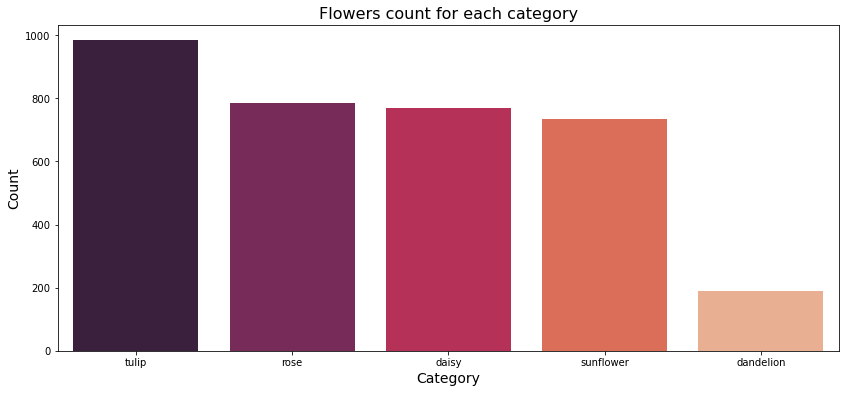

In [22]:
# Let's do some visualization and see how many samples we have for each category
f, axe = plt.subplots(1,1,figsize=(14,6))
sns.barplot(x = flowerNum.index, y = flowerNum.values, ax = axe, palette="rocket")
axe.set_title("Flowers count for each category", fontsize=16)
axe.set_xlabel('Category', fontsize=14)
axe.set_ylabel('Count', fontsize=14)
plt.show()

After extracting all of the flower data from the file, we converted image to pixels & printed them out for all the random sampled images.

In [23]:
# convert image to pixels, print the pixels
def convert_pix_matrix(imageUrl):
    pix_val = imread(imageUrl)
    return pix_val

def heightWidth(imageUrl,heightWidth):
    im = Image.open(imageUrl)
    h, w = im.size
    if (heightWidth == "width"):
        return w
    else:
        return h
    
# first example from rand sample
print("image width: ", heightWidth(RanSamples[0],"width"))
print("image height: ", heightWidth(RanSamples[0],"height"))
print(convert_pix_matrix(RanSamples[0]))

# read the pixels and conver back to image
def readPixel(pixel):
    img = Image.fromarray(pixel)
    img.save('readPxielExample.png')
    img.show()
    
readPixel(convert_pix_matrix(RanSamples[1]))

image width:  334
image height:  500
[[[16 22  8]
  [ 5 10  3]
  [ 2  7  1]
  ...
  [ 4 12  0]
  [ 5 13  0]
  [ 5 13  0]]

 [[11 18  2]
  [ 2 10  0]
  [ 2 12  1]
  ...
  [ 5 13  0]
  [ 5 13  0]
  [ 4 12  0]]

 [[10 19  2]
  [ 3 16  0]
  [ 5 20  1]
  ...
  [ 5 13  0]
  [ 4 12  0]
  [ 4 12  0]]

 ...

 [[ 7 25  1]
  [ 6 24  0]
  [ 7 25  3]
  ...
  [51 34 40]
  [59 42 52]
  [62 46 57]]

 [[ 6 24  0]
  [ 6 24  2]
  [ 7 22  3]
  ...
  [58 36 39]
  [62 41 48]
  [63 42 51]]

 [[ 5 23  1]
  [ 5 23  1]
  [ 7 22  3]
  ...
  [64 44 45]
  [64 45 47]
  [61 42 44]]]
